In [62]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib

import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
digits = datasets.load_digits()

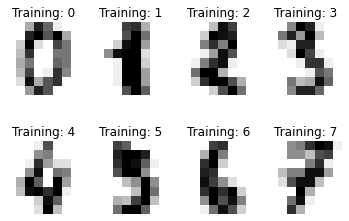

In [64]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [65]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [66]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [67]:
X, y = data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [68]:
# Don't cheat - fit only on training data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [69]:
net = joblib.load('mlp_net.pkl')

In [70]:
net.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=4000, solver='lbfgs')

In [71]:
score = 0
for i in range(100):
    expected = y_test
    predicted = net.predict(X_test)  
    score += net.score(X_test, y_test)*100
score = score / 100
print("-----------------------")    
print('Score: %.2f' % score)
print("-----------------------")
    
#print(metrics.classification_report(expected, predicted))

-----------------------
Score: 84.84
-----------------------


In [72]:
print(metrics.confusion_matrix(expected, predicted))

[[64  0  1  0  1  1  1  0  2  0]
 [ 0 61  0  0  1  3  0  1  1  1]
 [ 1  2 56 10  0  0  0  0  1  0]
 [ 0  0  2 49  0  0  0  2  3  7]
 [ 0  4  0  0 75  0  0  1  5  0]
 [ 0  0  0  5  0 59  0  0  0  7]
 [ 1  0  0  1  1  0 74  0  0  0]
 [ 0  3  0  1  2  2  0 62  1  4]
 [ 0  3  5  1  3  0  1  4 54  6]
 [ 0  1  0  2  2  1  0  0  1 56]]


In [73]:
net.n_iter_

380

In [74]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

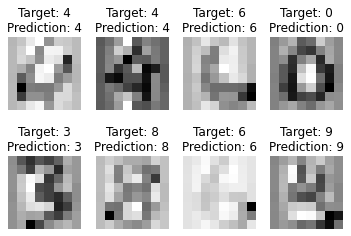

In [75]:
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Target: %i\nPrediction: %i' % (y_test[index],prediction))

In [76]:
joblib.dump(scaler, 'digits_scaler_Boix_Gil.pkl') 
joblib.dump(net, 'digits_net_Boix_Gil.pkl')

['digits_net_Boix_Gil.pkl']